In [ ]:
"""
This notebook will be exploring the distribution of vehicles traveling the BQE pre/post Weigh In Motion Enforcement.
We seek to determine if there was a statistically significant change in the volume of traffic/ type of traffic traversing the BQE.
"""

In [2]:
import pandas as pd

Seperating Pre-Enforcement and Post-Enforcement Data

In [3]:
#Queens Bound , 2019 - 2023
df = pd.read_csv("./Data/Daily_Vehicle_Count/QB_daily_vehicle_count_19_23.csv")

In [79]:
#Applying function to each row to create new column from year, month, day with format YYYYMMDD for the purpose of ordering data
def create_year_month_day(row):
    return f"{row['year']}{row['month']:02d}{row['day']:02d}"

df['year_month_day'] = df.apply(create_year_month_day, axis=1)

df

,direction,year,month,day,class,class_count,year_month_day
0,QB,23,1,27,13,34,230127
1,QB,23,8,24,14,119,230824
2,QB,23,3,20,6,763,230320
3,QB,23,12,11,5,3107,231211
4,QB,23,10,25,4,227,231025
...,...,...,...,...,...,...,...
18004,QB,19,11,14,12,1,191114
18005,QB,19,12,17,12,3,191217
18006,QB,19,10,19,12,1,191019
18007,QB,19,12,26,12,2,191226


In [80]:
df["year_month_day"] = df["year_month_day"].astype(int)
df = df.sort_values("year_month_day", ascending=True)
# Queens Bound WIM enforcement began Novemeber 13, 2023

df = df.reset_index(drop=True)

In [ ]:
#Filtering Pre/Post Enforcement Nov. 13, 2023
pre_enforcement_df1 = df[df["year_month_day"] < 231113]
post_enforcement_df1 = df[df["year_month_day"] >= 231113]

In [82]:
pre_enforcement_df1 #QB Daily Traffic Count Pre-enforcement 2019 - 2023

,direction,year,month,day,class,class_count,year_month_day
0,QB,19,10,16,5,1969,191016
1,QB,19,10,16,12,2,191016
2,QB,19,10,16,13,7,191016
3,QB,19,10,16,9,1866,191016
4,QB,19,10,16,3,7056,191016
...,...,...,...,...,...,...,...
17353,QB,23,11,12,3,4261,231112
17354,QB,23,11,12,9,487,231112
17355,QB,23,11,12,6,90,231112
17356,QB,23,11,12,5,1032,231112


In [83]:
post_enforcement_df1 #QB Daily Traffic Count Post-enforcement 2019 - 2023

,direction,year,month,day,class,class_count,year_month_day
17358,QB,23,11,13,4,208,231113
17359,QB,23,11,13,11,20,231113
17360,QB,23,11,13,9,1554,231113
17361,QB,23,11,13,2,33659,231113
17362,QB,23,11,13,6,713,231113
...,...,...,...,...,...,...,...
18004,QB,23,12,31,4,131,231231
18005,QB,23,12,31,3,3514,231231
18006,QB,23,12,31,5,866,231231
18007,QB,23,12,31,8,49,231231


In [ ]:
df2 = pd.read_csv("./Data/Daily_Vehicle_Count/QB_daily_vehicle_count_24_25.csv")

df2

,direction,year,month,day,class,class_count
0,QB,24,6,11,2,30297
1,QB,24,2,15,3,6536
2,QB,24,3,17,3,3864
3,QB,24,2,26,6,644
4,QB,24,4,25,4,366
...,...,...,...,...,...,...
5772,QB,25,1,16,13,1
5773,QB,25,2,2,14,1
5774,QB,25,1,30,14,1
5775,QB,25,3,26,14,2


In [84]:
df2['year_month_day'] = df2.apply(create_year_month_day, axis=1)

df2

,direction,year,month,day,class,class_count,year_month_day
1846,QB,24,1,1,1,38,240101
4823,QB,24,1,1,14,7,240101
849,QB,24,1,1,7,8,240101
194,QB,24,1,1,5,797,240101
555,QB,24,1,1,12,9,240101
...,...,...,...,...,...,...,...
5076,QB,25,3,31,9,711,250331
5018,QB,25,3,31,8,87,250331
5069,QB,25,3,31,11,9,250331
4889,QB,25,3,31,3,2016,250331


In [88]:
df2["year_month_day"] = df2["year_month_day"].astype(int)
df2 = df2.sort_values("year_month_day", ascending=True)
df2 = df2.reset_index(drop=True)

In [89]:
df2

,direction,year,month,day,class,class_count,year_month_day
0,QB,24,1,1,1,38,240101
1,QB,24,1,1,14,7,240101
2,QB,24,1,1,7,8,240101
3,QB,24,1,1,5,797,240101
4,QB,24,1,1,12,9,240101
...,...,...,...,...,...,...,...
5772,QB,25,3,31,9,711,250331
5773,QB,25,3,31,8,87,250331
5774,QB,25,3,31,11,9,250331
5775,QB,25,3,31,3,2016,250331


In [ ]:
post_enforcement_df2 = pd.concat([post_enforcement_df1,df2], axis=0) 
#Joining Historical and Current Data to form comprehensive post-enforcement df for daily vehicle count QB.

post_enforcement_df2 = post_enforcement_df2.reset_index(drop=True)

post_enforcement_df2

,direction,year,month,day,class,class_count,year_month_day
0,QB,23,11,13,4,208,231113
1,QB,23,11,13,11,20,231113
2,QB,23,11,13,9,1554,231113
3,QB,23,11,13,2,33659,231113
4,QB,23,11,13,6,713,231113
...,...,...,...,...,...,...,...
6423,QB,25,3,31,9,711,250331
6424,QB,25,3,31,8,87,250331
6425,QB,25,3,31,11,9,250331
6426,QB,25,3,31,3,2016,250331


In [ ]:
pre_enforcement_df1.to_csv("QB_pre_enforcement.csv", index=False)

post_enforcement_df2.to_csv("QB_post_enforcement.csv", index=False         )

Pre-enforcement SI bound Data

In [93]:
df3 = pd.read_csv("./Data/Daily_Vehicle_Count/SIB_daily_vehicle_count_19_23.csv")

df3

,direction,year,month,day,class,class_count
0,SIB,20,5,10,2,34801
1,SIB,20,1,12,2,57089
2,SIB,20,4,26,2,24158
3,SIB,20,7,29,3,8089
4,SIB,20,7,16,2,40987
...,...,...,...,...,...,...
5685,SIB,19,11,3,7,2
5686,SIB,19,11,24,13,1
5687,SIB,19,11,30,12,1
5688,SIB,19,12,29,12,1


In [94]:
df3['year_month_day'] = df3.apply(create_year_month_day, axis=1)

df3

,direction,year,month,day,class,class_count,year_month_day
0,SIB,20,5,10,2,34801,200510
1,SIB,20,1,12,2,57089,200112
2,SIB,20,4,26,2,24158,200426
3,SIB,20,7,29,3,8089,200729
4,SIB,20,7,16,2,40987,200716
...,...,...,...,...,...,...,...
5685,SIB,19,11,3,7,2,191103
5686,SIB,19,11,24,13,1,191124
5687,SIB,19,11,30,12,1,191130
5688,SIB,19,12,29,12,1,191229


In [95]:
df3["year_month_day"] = df3["year_month_day"].astype(int)
df3 = df3.sort_values("year_month_day", ascending=True)
df3 = df3.reset_index(drop=True)

df3

,direction,year,month,day,class,class_count,year_month_day
0,SIB,19,10,11,12,269,191011
1,SIB,19,10,11,14,7943,191011
2,SIB,19,10,11,5,1719,191011
3,SIB,19,10,11,6,798,191011
4,SIB,19,10,11,1,2755,191011
...,...,...,...,...,...,...,...
5685,SIB,20,12,31,8,72,201231
5686,SIB,20,12,31,7,13,201231
5687,SIB,20,12,31,11,2,201231
5688,SIB,20,12,31,3,3394,201231


In [96]:
df3.to_csv("./Data/Pre_Post_Enforcement/SIB_pre_enforcement.csv", index=False)

Comparing Pre-enforcement Vehicle Count Distribution vs. Post-enforcement

In [1]:
import pandas as pd
#Queens Bound Traffic

pre_df = pd.read_csv("./Data/Pre_Post_Enforcement/QB_pre_enforcement.csv")
post_df = pd.read_csv("./Data/Pre_Post_Enforcement/QB_post_enforcement.csv")

In [2]:
pre_df2 = pre_df[(pre_df["year_month_day"] >= 210331) & (pre_df["year_month_day"] < 231113)] #pre_df2 filters for 2 year period before enforcement

pre_df2

,direction,year,month,day,class,class_count,year_month_day
6591,QB,21,3,31,7,59,210331
6592,QB,21,3,31,6,829,210331
6593,QB,21,3,31,12,1,210331
6594,QB,21,3,31,11,55,210331
6595,QB,21,3,31,5,2001,210331
...,...,...,...,...,...,...,...
17353,QB,23,11,12,3,4261,231112
17354,QB,23,11,12,9,487,231112
17355,QB,23,11,12,6,90,231112
17356,QB,23,11,12,5,1032,231112


In [4]:
import numpy as np

bool_label = pre_df2.shape[0]
pre_df2["pre_post_bool"] = np.zeros(bool_label, dtype="int")

pre_df2

C:\Users\rubie\AppData\Local\Temp\ipykernel_2456\1443356772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df2["pre_post_bool"] = np.zeros(bool_label, dtype="int")


,direction,year,month,day,class,class_count,year_month_day,pre_post_bool
6591,QB,21,3,31,7,59,210331,0
6592,QB,21,3,31,6,829,210331,0
6593,QB,21,3,31,12,1,210331,0
6594,QB,21,3,31,11,55,210331,0
6595,QB,21,3,31,5,2001,210331,0
...,...,...,...,...,...,...,...,...
17353,QB,23,11,12,3,4261,231112,0
17354,QB,23,11,12,9,487,231112,0
17355,QB,23,11,12,6,90,231112,0
17356,QB,23,11,12,5,1032,231112,0


In [5]:
bool_label = post_df.shape[0]
post_df["pre_post_bool"] = np.ones(bool_label, dtype="int")

post_df

,direction,year,month,day,class,class_count,year_month_day,pre_post_bool
0,QB,23,11,13,4,208,231113,1
1,QB,23,11,13,11,20,231113,1
2,QB,23,11,13,9,1554,231113,1
3,QB,23,11,13,2,33659,231113,1
4,QB,23,11,13,6,713,231113,1
...,...,...,...,...,...,...,...,...
6423,QB,25,3,31,9,711,250331,1
6424,QB,25,3,31,8,87,250331,1
6425,QB,25,3,31,11,9,250331,1
6426,QB,25,3,31,3,2016,250331,1


In [6]:
#vehicle classes observed pre/post-enforcement
pre_classes = pre_df2["class"].unique().tolist()
post_classes = post_df["class"].unique().tolist()

In [7]:
pre_post_classes = [] # vehicle classes observed pre and post enforcement

temp_list = pre_classes+post_classes
for item in temp_list:
    if item not in pre_post_classes:
        pre_post_classes.append(item)

pre_post_classes 

[7, 6, 12, 11, 5, 8, 4, 3, 1, 9, 13, 10, 2, 14]

In [8]:
pre_post_classes = list(map(int, pre_post_classes))

pre_post_classes.sort()
pre_post_classes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [9]:
pre2_post2_df = pd.concat([pre_df2,post_df], axis=0)

pre2_post2_df

,direction,year,month,day,class,class_count,year_month_day,pre_post_bool
6591,QB,21,3,31,7,59,210331,0
6592,QB,21,3,31,6,829,210331,0
6593,QB,21,3,31,12,1,210331,0
6594,QB,21,3,31,11,55,210331,0
6595,QB,21,3,31,5,2001,210331,0
...,...,...,...,...,...,...,...,...
6423,QB,25,3,31,9,711,250331,1
6424,QB,25,3,31,8,87,250331,1
6425,QB,25,3,31,11,9,250331,1
6426,QB,25,3,31,3,2016,250331,1


In [10]:
#Creating a new date column ignoring year to compare veh. count pre/post the same period in the year
def create_month_day(row):
    return int(str(row["year_month_day"])[2:])

pre2_post2_df['month_day'] = pre2_post2_df.apply(create_month_day, axis=1)

pre2_post2_df

,direction,year,month,day,class,class_count,year_month_day,pre_post_bool,month_day
6591,QB,21,3,31,7,59,210331,0,331
6592,QB,21,3,31,6,829,210331,0,331
6593,QB,21,3,31,12,1,210331,0,331
6594,QB,21,3,31,11,55,210331,0,331
6595,QB,21,3,31,5,2001,210331,0,331
...,...,...,...,...,...,...,...,...,...
6423,QB,25,3,31,9,711,250331,1,331
6424,QB,25,3,31,8,87,250331,1,331
6425,QB,25,3,31,11,9,250331,1,331
6426,QB,25,3,31,3,2016,250331,1,331


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Vehicle Class 1

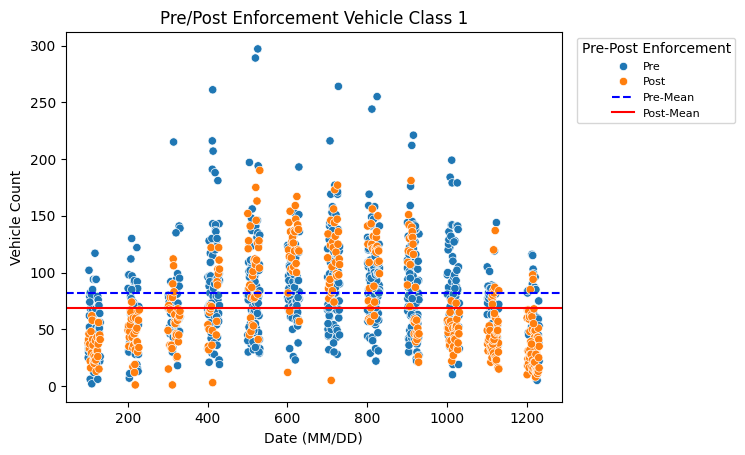

In [23]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 1] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 1")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [143]:
#Mean Variance of Daily Vehicle Count Veh. Class 1 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    320.000000
mean      82.846875
std       42.734857
min        2.000000
25%       47.750000
50%       86.000000
75%      116.000000
max      261.000000
Name: class_count, dtype: float64

In [144]:
#Mean Variance of Daily Vehicle Count Veh. Class 1 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    358.000000
mean      74.648045
std       40.432731
min        3.000000
25%       42.250000
50%       62.000000
75%      109.000000
max      190.000000
Name: class_count, dtype: float64

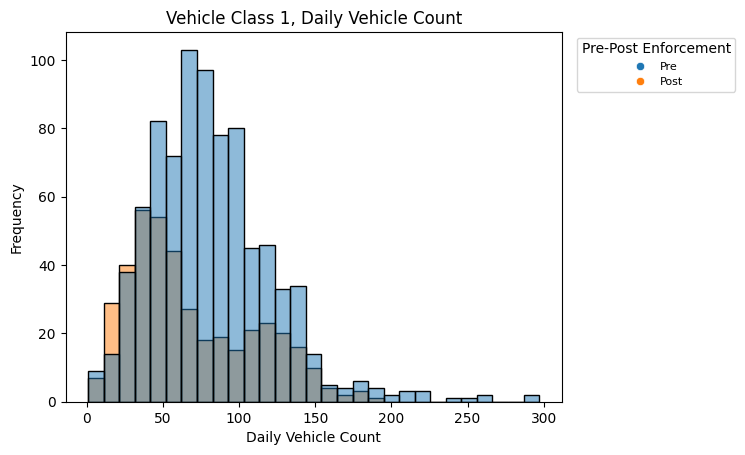

In [25]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 1, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 2

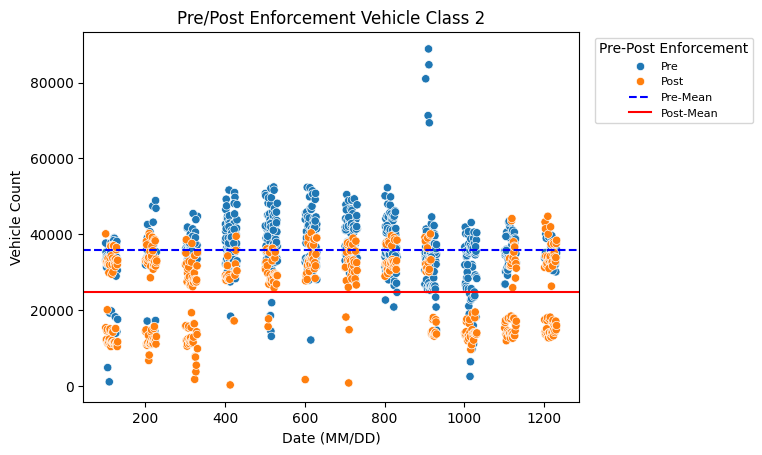

In [26]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 2] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 2")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [146]:
#Mean Variance of Daily Vehicle Count Veh. Class 2 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count      320.000000
mean     30774.540625
std       6743.206235
min       1202.000000
25%      28613.750000
50%      32263.000000
75%      33815.250000
max      43494.000000
Name: class_count, dtype: float64

In [147]:
#Mean Variance of Daily Vehicle Count Veh. Class 2 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count      358.000000
mean     29407.963687
std       8248.195415
min        385.000000
25%      27855.750000
50%      31813.500000
75%      33967.250000
max      44783.000000
Name: class_count, dtype: float64

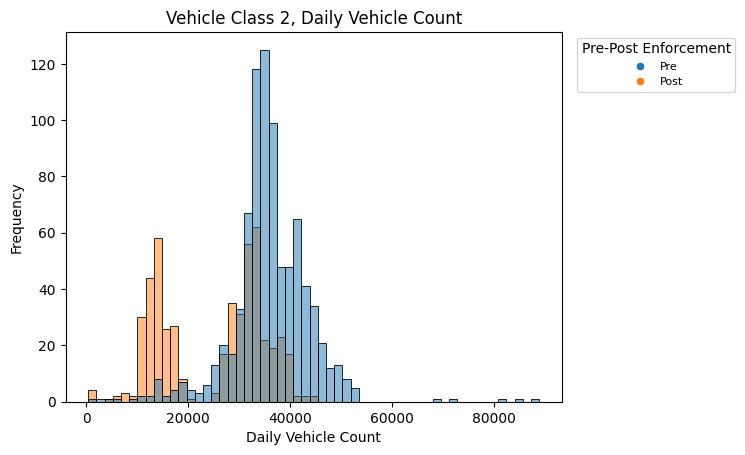

In [28]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 2, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 3

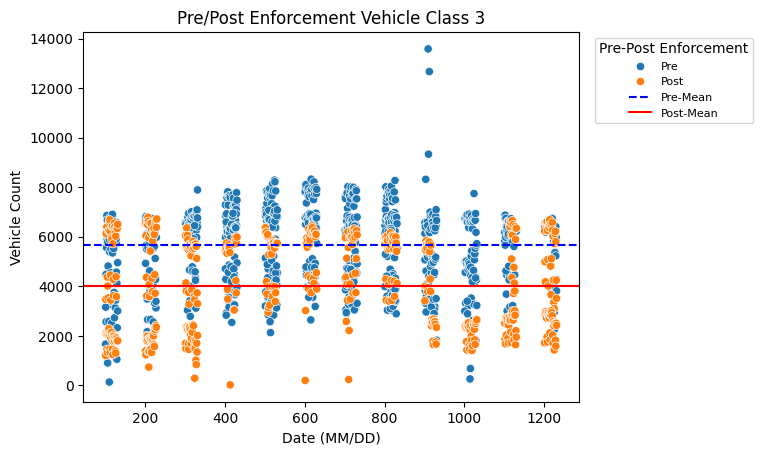

In [29]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 3] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 3")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [149]:
#Mean Variance of Daily Vehicle Count Veh. Class 3 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count     320.000000
mean     5362.387500
std      1406.571904
min       137.000000
25%      4456.000000
50%      5798.500000
75%      6525.500000
max      7743.000000
Name: class_count, dtype: float64

In [150]:
#Mean Variance of Daily Vehicle Count Veh. Class 3 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count     358.000000
mean     4754.567039
std      1566.186185
min        20.000000
25%      3594.250000
50%      5532.000000
75%      6025.500000
max      6790.000000
Name: class_count, dtype: float64

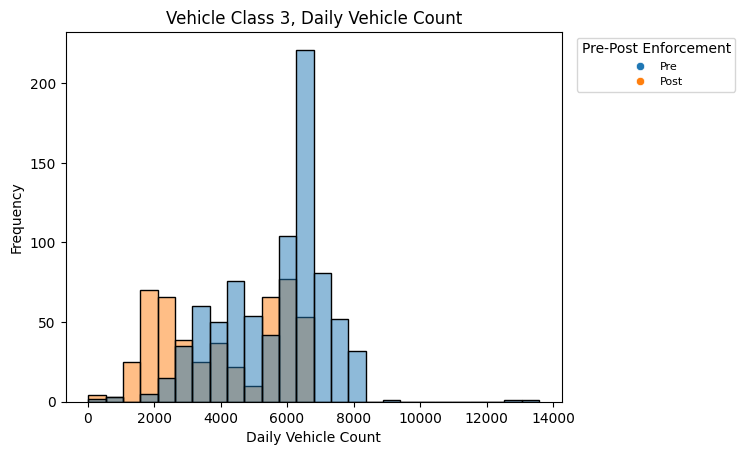

In [30]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 3, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 4

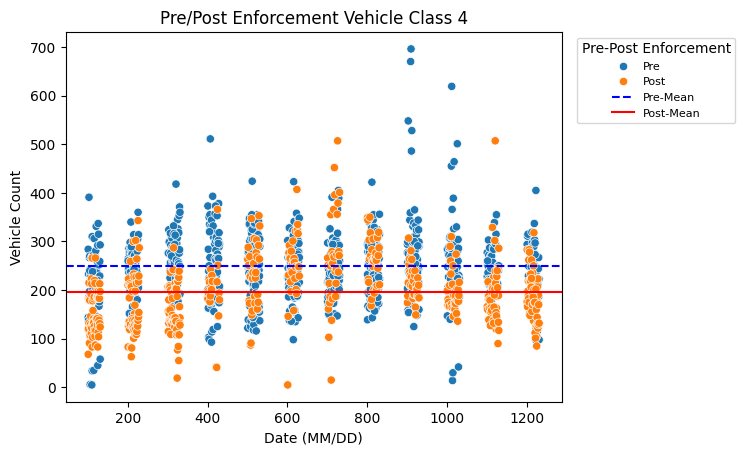

In [31]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 4] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 4")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [152]:
#Mean Variance of Daily Vehicle Count Veh. Class 4 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    320.000000
mean     226.553125
std       72.637139
min        5.000000
25%      186.000000
50%      223.000000
75%      260.000000
max      619.000000
Name: class_count, dtype: float64

In [153]:
#Mean Variance of Daily Vehicle Count Veh. Class 4 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    357.000000
mean     217.627451
std       65.623018
min        5.000000
25%      179.000000
50%      210.000000
75%      255.000000
max      507.000000
Name: class_count, dtype: float64

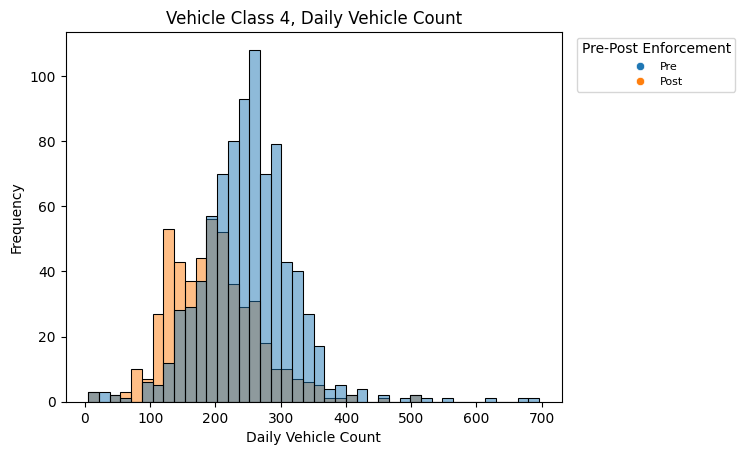

In [32]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 4, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 5

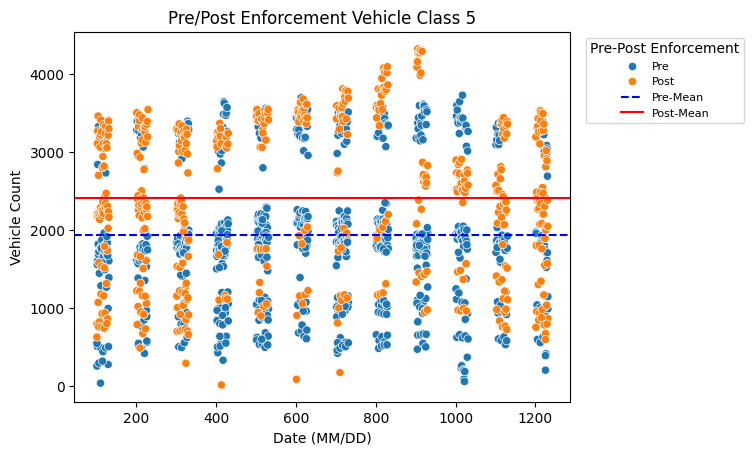

In [33]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 5] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 5")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [155]:
#Mean Variance of Daily Vehicle Count Veh. Class 5 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count     320.000000
mean     2575.240625
std      1045.645790
min        37.000000
25%      1663.000000
50%      3167.500000
75%      3374.000000
max      3732.000000
Name: class_count, dtype: float64

In [156]:
#Mean Variance of Daily Vehicle Count Veh. Class 5 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count     358.000000
mean     2642.650838
std      1000.709722
min        14.000000
25%      1756.250000
50%      3041.000000
75%      3408.750000
max      4326.000000
Name: class_count, dtype: float64

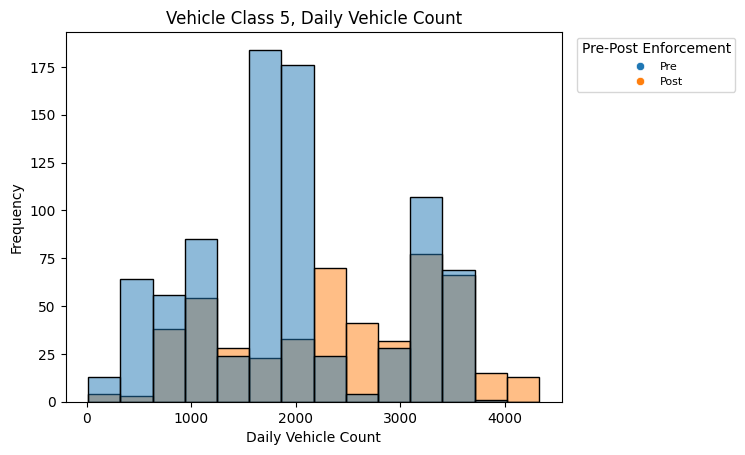

In [34]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 5, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 6

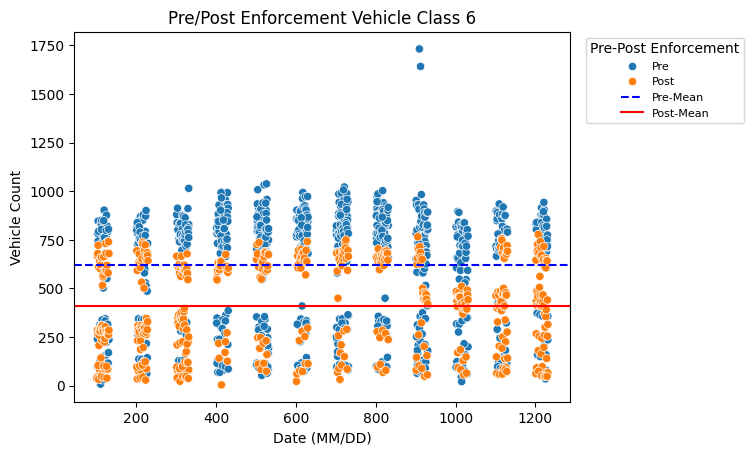

In [35]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 6] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 6")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [158]:
#Mean Variance of Daily Vehicle Count Veh. Class 6 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    320.00000
mean     557.63750
std      272.54745
min        8.00000
25%      280.75000
50%      697.50000
75%      768.25000
max      943.00000
Name: class_count, dtype: float64

In [159]:
#Mean Variance of Daily Vehicle Count Veh. Class 6 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    358.000000
mean     466.681564
std      230.907233
min        4.000000
25%      247.000000
50%      589.000000
75%      657.750000
max      778.000000
Name: class_count, dtype: float64

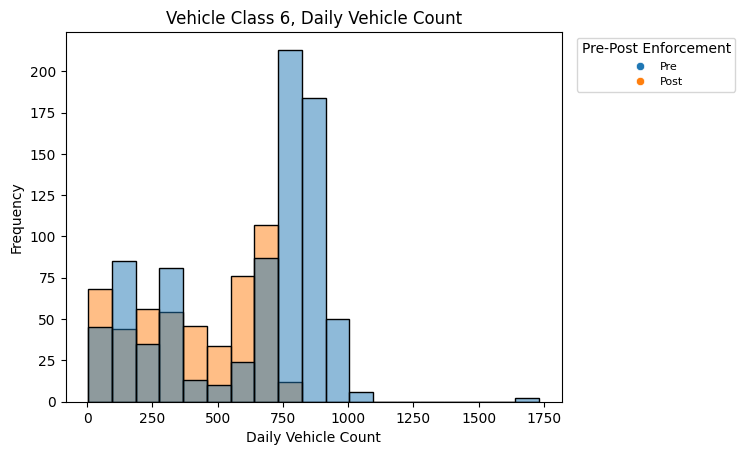

In [36]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 6, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 7

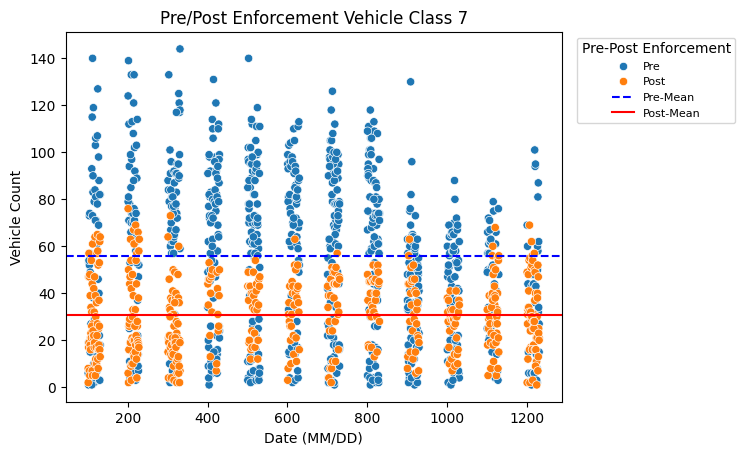

In [39]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 7] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 7")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [161]:
#Mean Variance of Daily Vehicle Count Veh. Class 7 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    320.000000
mean      59.893750
std       30.451688
min        1.000000
25%       31.750000
50%       64.000000
75%       84.000000
max      144.000000
Name: class_count, dtype: float64

In [162]:
#Mean Variance of Daily Vehicle Count Veh. Class 7 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    357.000000
mean      35.392157
std       15.168631
min        2.000000
25%       24.000000
50%       36.000000
75%       46.000000
max       76.000000
Name: class_count, dtype: float64

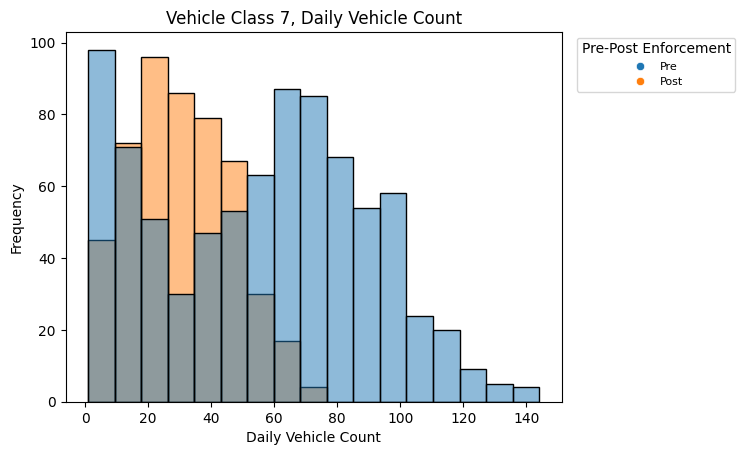

In [38]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 7, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 8

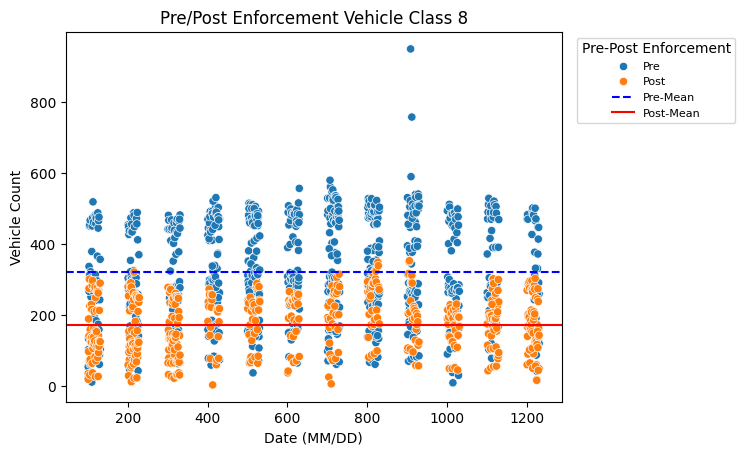

In [40]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 8] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 8")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [164]:
#Mean Variance of Daily Vehicle Count Veh. Class 8 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    320.000000
mean     216.515625
std       87.258020
min        9.000000
25%      150.000000
50%      248.500000
75%      286.000000
max      372.000000
Name: class_count, dtype: float64

In [165]:
#Mean Variance of Daily Vehicle Count Veh. Class 8 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    358.000000
mean     195.960894
std       76.022248
min        3.000000
25%      143.250000
50%      210.000000
75%      255.000000
max      353.000000
Name: class_count, dtype: float64

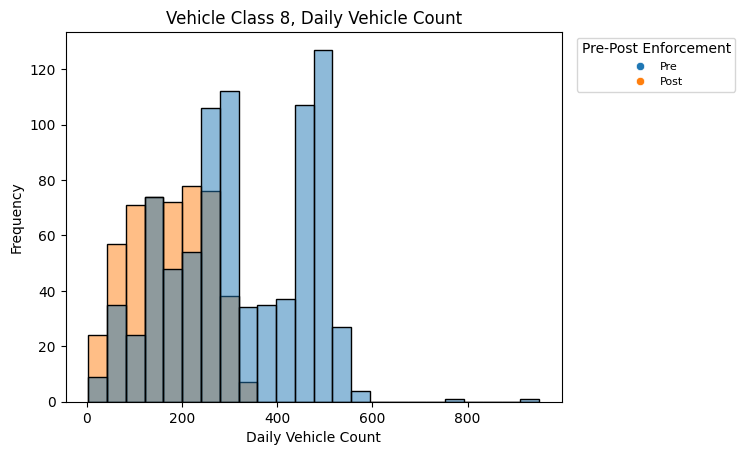

In [41]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 8, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 9

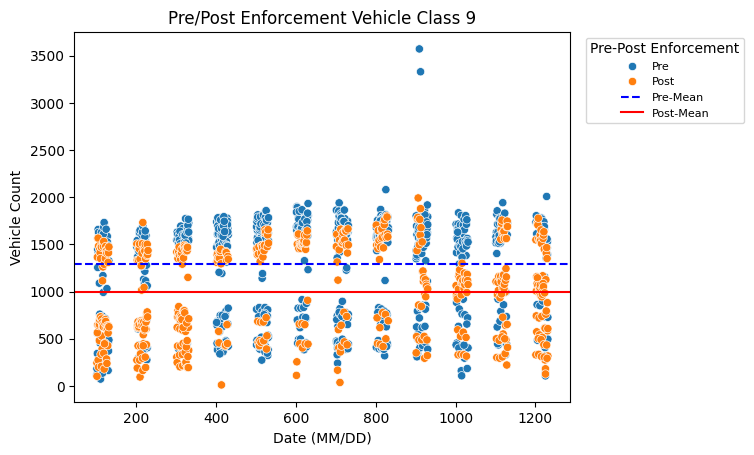

In [42]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 9] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 9")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [167]:
#Mean Variance of Daily Vehicle Count Veh. Class 9 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count     320.000000
mean     1231.265625
std       523.836889
min        72.000000
25%       659.750000
50%      1506.500000
75%      1632.250000
max      2080.000000
Name: class_count, dtype: float64

In [168]:
#Mean Variance of Daily Vehicle Count Veh. Class 9 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count     358.000000
mean     1133.916201
std       472.205866
min        10.000000
25%       641.250000
50%      1344.000000
75%      1501.000000
max      1992.000000
Name: class_count, dtype: float64

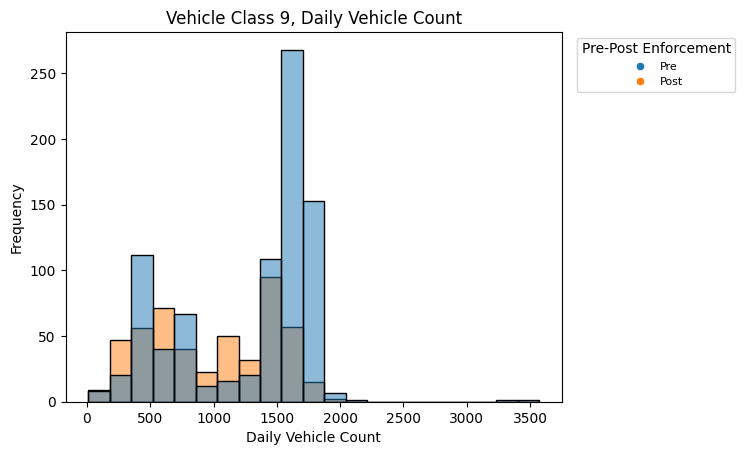

In [43]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 9, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 10

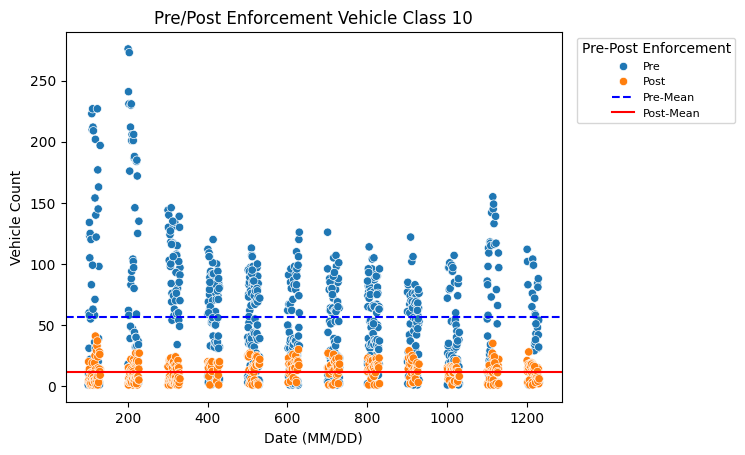

In [44]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 10] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 10")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [170]:
#Mean Variance of Daily Vehicle Count Veh. Class 10 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    305.000000
mean      32.786885
std       26.331587
min        1.000000
25%       14.000000
50%       29.000000
75%       41.000000
max      146.000000
Name: class_count, dtype: float64

In [171]:
#Mean Variance of Daily Vehicle Count Veh. Class 10 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    332.000000
mean      13.469880
std        7.816765
min        1.000000
25%        7.000000
50%       14.000000
75%       19.000000
max       41.000000
Name: class_count, dtype: float64

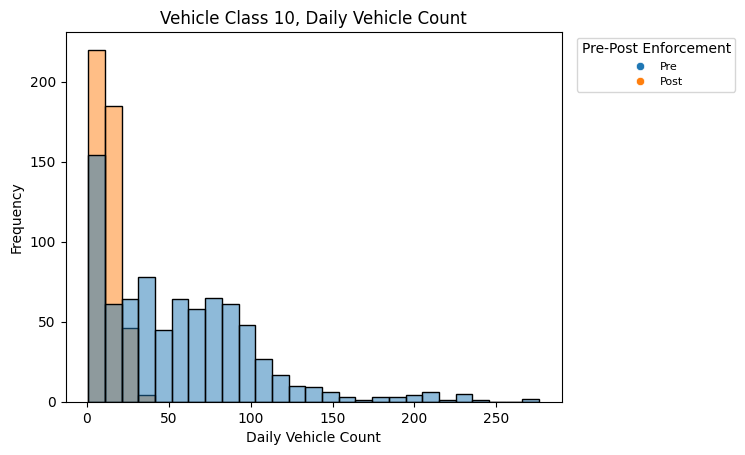

In [45]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 10, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 11

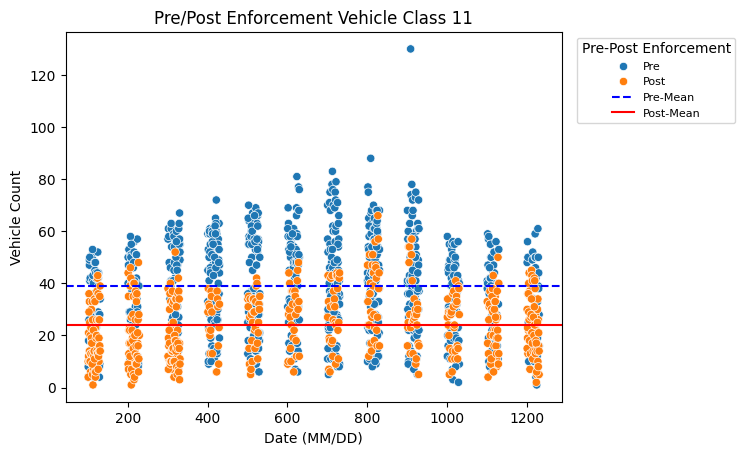

In [46]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 11] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 11")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [173]:
#Mean Variance of Daily Vehicle Count Veh. Class 11 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    319.000000
mean      34.175549
std       15.749830
min        2.000000
25%       22.000000
50%       36.000000
75%       46.000000
max       68.000000
Name: class_count, dtype: float64

In [174]:
#Mean Variance of Daily Vehicle Count Veh. Class 11 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    356.000000
mean      27.308989
std       12.147452
min        1.000000
25%       17.000000
50%       28.000000
75%       36.000000
max       66.000000
Name: class_count, dtype: float64

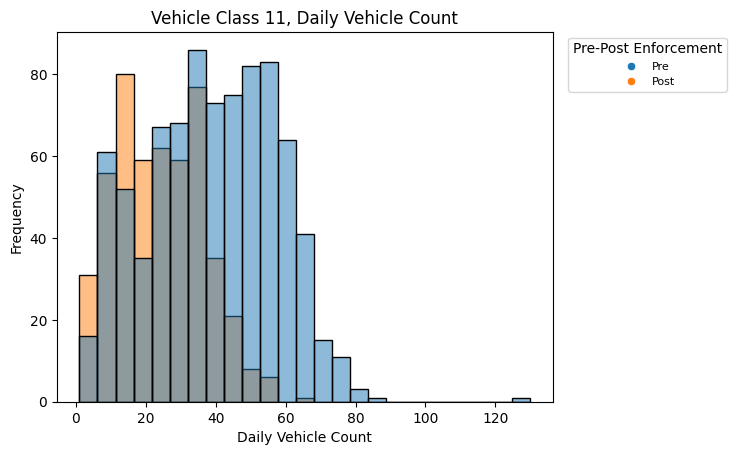

In [47]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 11, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 12

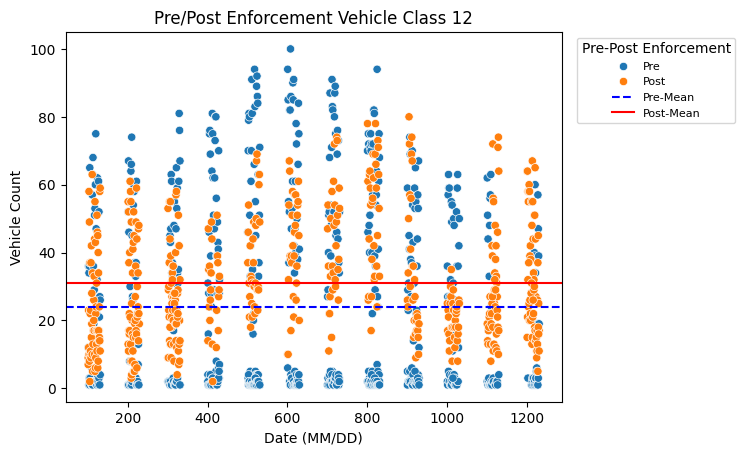

In [48]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 12] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 12")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [176]:
#Mean Variance of Daily Vehicle Count Veh. Class 12 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    319.000000
mean      48.962382
std       21.642140
min        3.000000
25%       33.000000
50%       48.000000
75%       64.500000
max      100.000000
Name: class_count, dtype: float64

In [177]:
#Mean Variance of Daily Vehicle Count Veh. Class 12 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    356.000000
mean      37.050562
std       17.058564
min        2.000000
25%       23.000000
50%       34.000000
75%       51.000000
max       80.000000
Name: class_count, dtype: float64

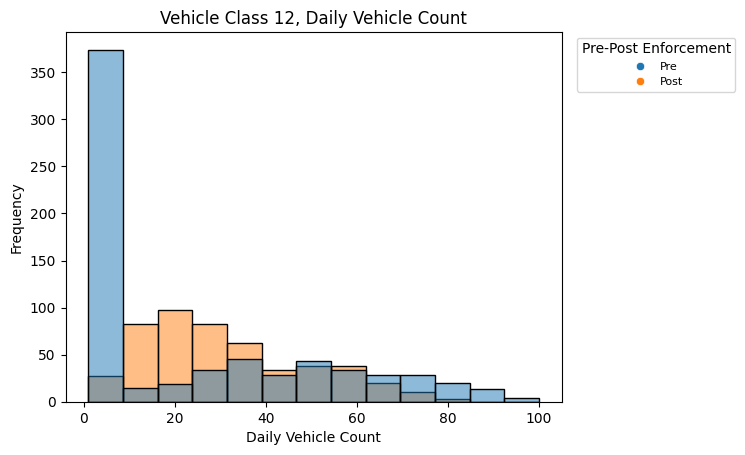

In [49]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 12, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 13

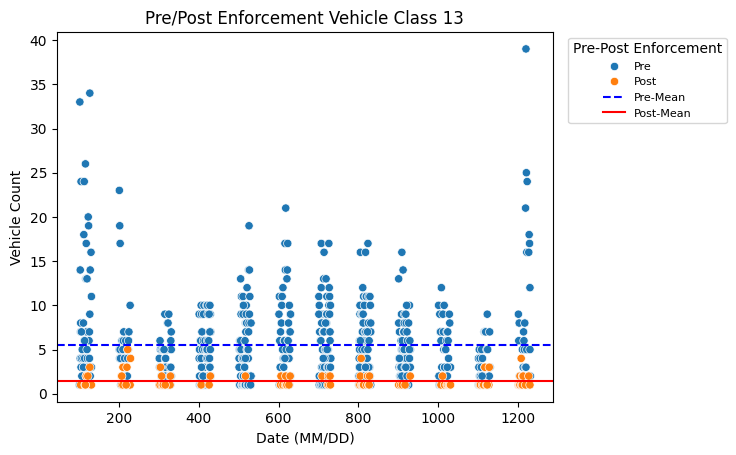

In [50]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 13] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 13")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [179]:
#Mean Variance of Daily Vehicle Count Veh. Class 13 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    150.000000
mean       5.186667
std        7.742835
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       39.000000
Name: class_count, dtype: float64

In [180]:
#Mean Variance of Daily Vehicle Count Veh. Class 13 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    98.000000
mean      1.479592
std       0.827736
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: class_count, dtype: float64

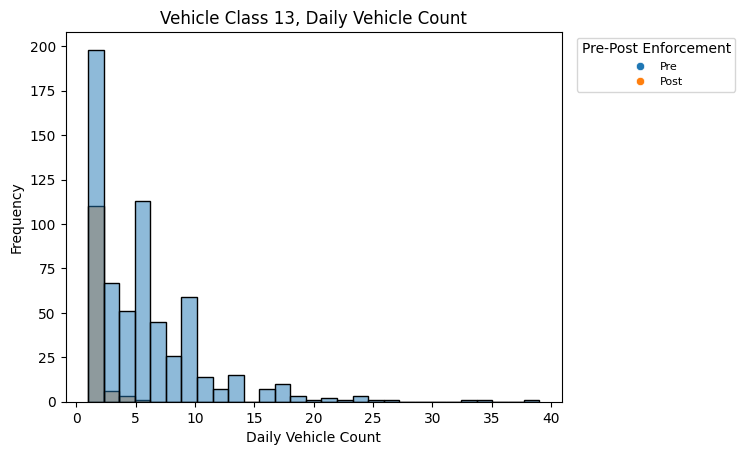

In [51]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 13, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

Vehicle Class 14

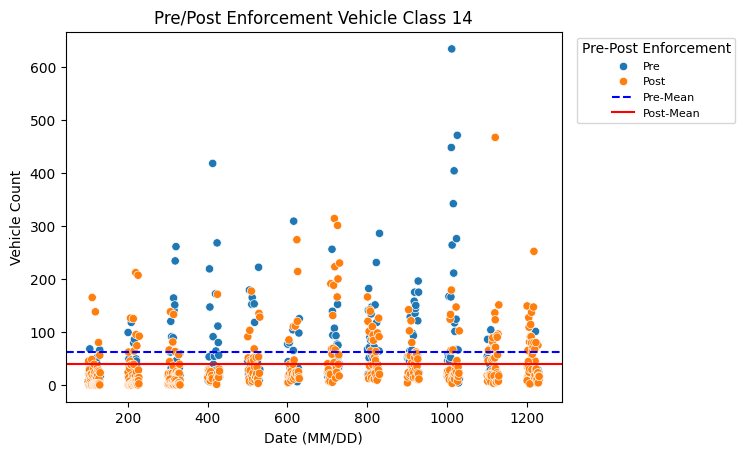

In [52]:
filtered_pre2_post2_df = pre2_post2_df[pre2_post2_df["class"] == 14] #filtering for Veh. Class 1

veh_plot = sns.scatterplot(data=filtered_pre2_post2_df, x = "month_day", y = "class_count", hue = "pre_post_bool")


#adding mean lines
pre_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 0, "class_count"
    ].mean()

post_enf_mean = filtered_pre2_post2_df.loc[
    filtered_pre2_post2_df["pre_post_bool"] == 1, "class_count"
    ].mean()

mean_line1 = veh_plot.axhline(pre_enf_mean, color="blue", linestyle="--", label=f"Mean X = {pre_enf_mean:.2f}")
mean_line2 = veh_plot.axhline(post_enf_mean, color="red", linestyle="-", label=f"Mean X = {pre_enf_mean:.2f}")


veh_plot.set_xlabel("Date (MM/DD)")
veh_plot.set_ylabel("Vehicle Count")
veh_plot.set_title("Pre/Post Enforcement Vehicle Class 14")
handles, labels = veh_plot.get_legend_handles_labels()

#pre mean
handles.append(mean_line1)
labels.append(f"Pre-Enf Mean = {pre_enf_mean:.2f}")

#post mean
handles.append(mean_line2)
labels.append(f"Post-Enf Mean = {post_enf_mean:.2f}")


veh_plot.legend(
    handles,
    ["Pre", "Post", "Pre-Mean","Post-Mean"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

# 0 pre-enf. 1 post-enf.

In [182]:
#Mean Variance of Daily Vehicle Count Veh. Class 14 Pre-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 0]["class_count"].describe()

count    319.000000
mean      63.789969
std       80.063162
min        3.000000
25%       19.500000
50%       35.000000
75%       70.500000
max      635.000000
Name: class_count, dtype: float64

In [183]:
#Mean Variance of Daily Vehicle Count Veh. Class 14 Post-enforcement
filtered_pre2_post2_df[filtered_pre2_post2_df["pre_post_bool"] == 1]["class_count"].describe()

count    356.000000
mean      48.407303
std       57.009264
min        2.000000
25%       16.000000
50%       24.500000
75%       56.250000
max      468.000000
Name: class_count, dtype: float64

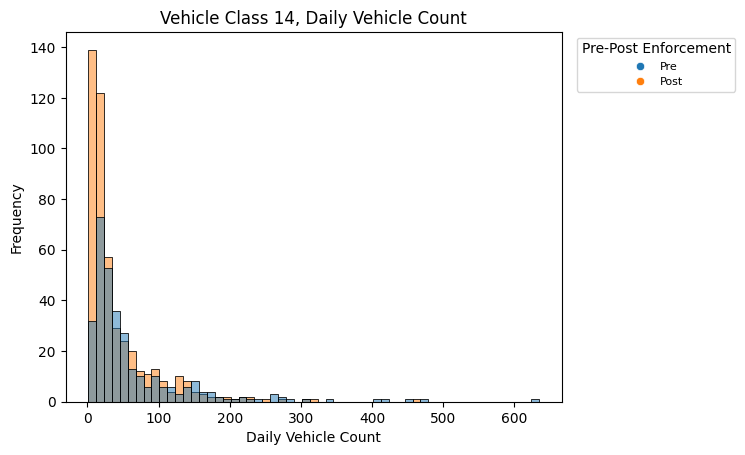

In [53]:
veh_pdf = sns.histplot(data= filtered_pre2_post2_df, x="class_count", hue="pre_post_bool")

veh_pdf.set_xlabel("Daily Vehicle Count")
veh_pdf.set_ylabel("Frequency")
veh_pdf.set_title("Vehicle Class 14, Daily Vehicle Count")
handles, labels = veh_plot.get_legend_handles_labels()

veh_pdf.legend(
    handles,
    ["Pre", "Post"],
    title="Pre-Post Enforcement",
    fontsize=8,
    bbox_to_anchor=(1.02, 1), loc="upper left"  # move & shrink legend box
)

plt.show()

In [54]:
pre2_post2_df.to_csv("Data/Pre_Post_Enforcement/QB_pre_post_2year_period.csv", index=False)